<img src="assets/8_Main_Types_of_Heart_Disease.jpg" style="display:block; margin:auto" width=350>

<h1><center>Project: Predicting Employee Productivity Using Tree-Based Models</center></h1>

#### Overview
In this project, we will analyze the Productivity Prediction of Garment Employees dataset, sourced from the UCI Machine Learning Repository. This dataset provides valuable insights into the productivity of garment manufacturing employees, making it an excellent candidate for both regression and classification analysis.

The garment industry, a cornerstone of global manufacturing, is known for its labor-intensive processes and reliance on manual operations. As global demand for garment products continues to rise, the productivity and efficiency of employees within garment factories become increasingly critical. This makes it imperative for decision-makers to monitor, analyze, and predict the performance of their workforce to ensure optimal production levels and timely deliveries.

#### Objective
Our goal in this project is to build predictive models using tree-based algorithms, such as Decision Trees and Random Forests, to forecast employee productivity. The dataset's versatility allows us to approach this problem from both regression and classification perspectives:

- Regression: Predicting the actual productivity as a continuous value ranging from 0 to 1.
- Classification: Transforming the productivity range into discrete classes and predicting the class labels.

#### Dataset Description
The dataset captures various aspects of garment production processes and employee performance. Below is a summary of the key features:

- `date`: The date of the observation (MM-DD-YYYY).
- `quarter`: A portion of the month divided into four quarters.
- `department`: The department associated with the observation (e.g., sewing, finishing).
- `day`: The day of the week for the observation.
- `team`: The team number associated with the observation.
- `targeted_productivity`: The productivity target set for each team for each day.
- `smv`: Standard Minute Value — the time allocated for a specific task.
- `wip`: Work In Progress — the number of unfinished items at various stages.
- `over_time`: The amount of overtime worked by each team (in minutes).
- `incentive`: The financial incentive provided (in BDT) to motivate teams.
- `idle_time`: The time duration when production was halted.
- `idle_men`: The number of workers who were idle due to interruptions.
- `no_of_style_change`: The number of style changes for a particular product.
- `no_of_workers`: The number of workers in each team.
- `actual_productivity`: The actual productivity percentage achieved by the team (ranging from 0 to 1).

#### Project Goals
Through this analysis, we aim to understand the key factors that impact employee productivity in the garment industry. By leveraging tree-based models, we will not only predict productivity outcomes but also provide actionable insights to help factory managers optimize workforce performance and resource allocation.

In [1]:
# Importing required libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn for model building, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


#### Dataset Exploration
In this section, we will perform an Exploratory Data Analysis (EDA) to understand the dataset's structure and characteristics.

Before making any modifications or assumptions, it's crucial to examine the data’s format and content. This will help us gain a foundational understanding of the dataset, including its shape, types, and basic statistical properties.

Let's begin by assessing the dataset's shape, which reveals the number of observations and features

In [4]:
# Checking the shape of the dataset to understand the number of rows (observations) and columns (features)
df.shape

(1197, 15)

The dataset contains 1,197 rows and 15 columns.

Next, we inspect the dataset's columns to determine the count of non-null values and their respective data types:

In [5]:
# Displaying information about columns, non-null values, and data types to assess the dataset's structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Note that in pandas, an "object" data type generally indicates text or categorical data.

Following this, we explore the descriptive statistics of the numerical features to identify key measures such as mean, standard deviation, minimum, and maximum values. This is particularly useful for detecting potential outliers or understanding the data distribution:

In [6]:
# Generating summary statistics for numerical columns to identify central tendencies, dispersion, and potential outliers
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


The describe() method provides an overview of central tendencies, spread, and overall range. For instance, the actual_productivity column shows a maximum value slightly above 1, contradicting the initial dataset description, which indicates a potential data entry error.

The wip (Work In Progress) column has a maximum value of 23122, suggesting a scenario where a significant number of unfinished items were recorded.

Moreover, the idle_time and idle_men columns both display a median of 0, indicating minimal production downtime and workforce idleness. This highlights efficient time management practices within the factory.

It is important to thoroughly examine these descriptive statistics to ensure a solid understanding of the dataset's nuances. This helps in preventing misinterpretations in subsequent analysis steps.

In the upcoming sections, we will delve deeper into each column individually to explore their unique distributions and potential correlations with the target variable.

Note: Exploratory data analysis is an open-ended exercise, and the provided code serves as guidance. Feel free to adjust the analysis according to your preferences and the insights you aim to derive. Our goal is to gain a comprehensive understanding of the dataset to make informed decisions later in the modeling process.

#### Advanced Data Exploration
In this advanced data exploration section, we aim to delve deeper into the dataset by utilizing more complex visualizations and statistical analyses. This helps us better understand the relationships between variables and their impact on the target variable, actual_productivity.

1. Correlation Analysis
Understanding the correlations between numerical features can provide insights into which variables are likely to impact productivity. We will use a correlation heatmap to visualize these relationships.

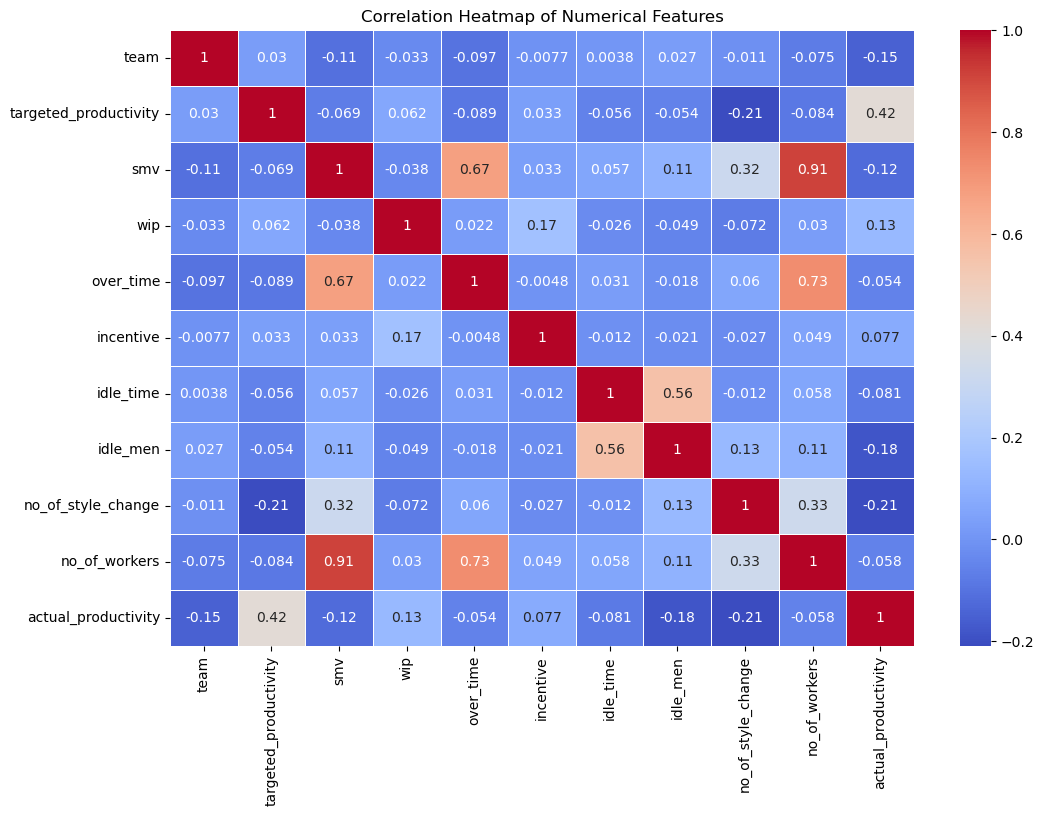

In [7]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a correlation heatmap to explore relationships between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The heatmap above visualizes the correlation matrix for all numerical features in the dataset, providing insights into how these variables interact with each other. Each cell in the heatmap represents the Pearson correlation coefficient between two features, ranging from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. A value around 0 implies no linear correlation between the features.

**Key Observations:**

- Strong Positive Correlations:

- no_of_workers and smv (0.91): The Standard Minute Value (SMV) is highly correlated with the number of workers. This suggests that tasks requiring more time (higher SMV) tend to involve larger teams, possibly due to increased labor requirements.
- over_time and no_of_workers (0.73): There is also a notable positive correlation between the number of workers and the amount of overtime. Larger teams seem to work more overtime, which may reflect more complex or demanding tasks.

**Moderate Positive Correlations:**

- targeted_productivity and actual_productivity (0.42): There is a moderate positive correlation between the targeted and actual productivity, indicating that as targets increase, actual productivity also tends to increase, though not perfectly.

**Weak or No Correlation:**

- Most other correlations are relatively weak, with coefficients close to 0. This indicates that those features do not have strong linear relationships with each other. For instance, incentive does not show a strong correlation with most other variables.

**Negative Correlations:**

- idle_men and actual_productivity (-0.18): There is a slight negative correlation between the number of idle men and actual productivity, which makes sense—more idle workers generally mean less productivity.
- no_of_style_change and actual_productivity (-0.21): Similarly, a negative correlation exists between the number of style changes and actual productivity. Frequent changes in style could disrupt production processes and reduce productivity.

2. Distribution Plots for Key Features
Understanding the distribution of key features helps identify skewness, potential outliers, and data transformations needed. We will use boxplots and violin plots for this purpose.

In [8]:
df['department'] = df['department'].replace('finishing ', 'finishing')

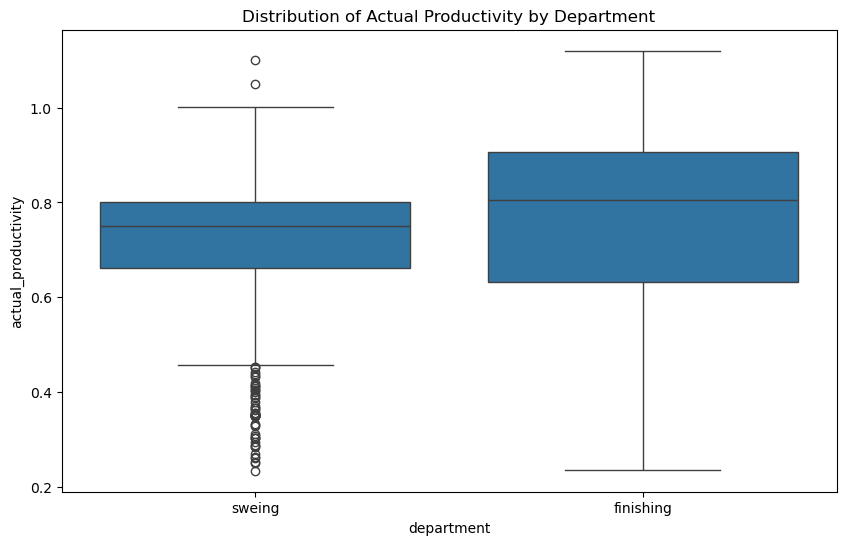

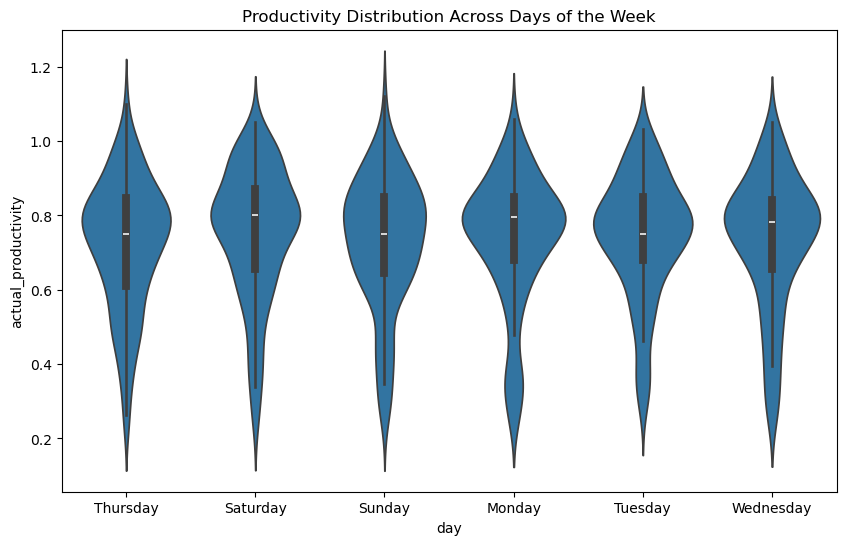

In [9]:
# Visualizing the distribution of 'actual_productivity' across different departments
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Distribution of Actual Productivity by Department')
plt.show()

# Violin plot to see the distribution of 'actual_productivity' across different days
plt.figure(figsize=(10, 6))
sns.violinplot(x='day', y='actual_productivity', data=df)
plt.title('Productivity Distribution Across Days of the Week')
plt.show()

The box plot visualizes the distribution of actual_productivity across different departments (sweing and finishing). The box represents the interquartile range (IQR), while the whiskers extend to show the rest of the distribution, except for outliers.

Key Insights:

- The median productivity for the finishing department is slightly higher than for the sweing department.
- The sweing department has several outliers on the lower end, indicating instances of lower productivity.
- The range of productivity is narrower in the finishing department compared to sweing, which suggests more consistent productivity levels in the finishing department.

The violin plot combines a box plot with a kernel density plot, providing a more comprehensive view of the distribution of actual_productivity across different days of the week.

Key Insights:

- The productivity distribution is relatively consistent across different days, with slight variations in density.
- On days like Tuesday and Wednesday, productivity tends to cluster around higher values, while on Thursday, there is a broader distribution with lower productivity outliers.
- The interquartile range (the width of the violin at different points) remains similar across the week, indicating that productivity does not vary significantly day-to-day in terms of spread.

3. Analyzing Relationships Between Key Variables
We will use scatter plots to understand relationships between features like targeted_productivity and actual_productivity to see how well the targets correlate with the actual outcomes.

Explanation: This scatter plot allows us to see if there is a linear relationship between the targeted and actual productivity and whether this varies by department.

4. Feature Interactions
Feature interactions are critical to understand how combinations of features affect the target variable. We can use pair plots to visualize these interactions.

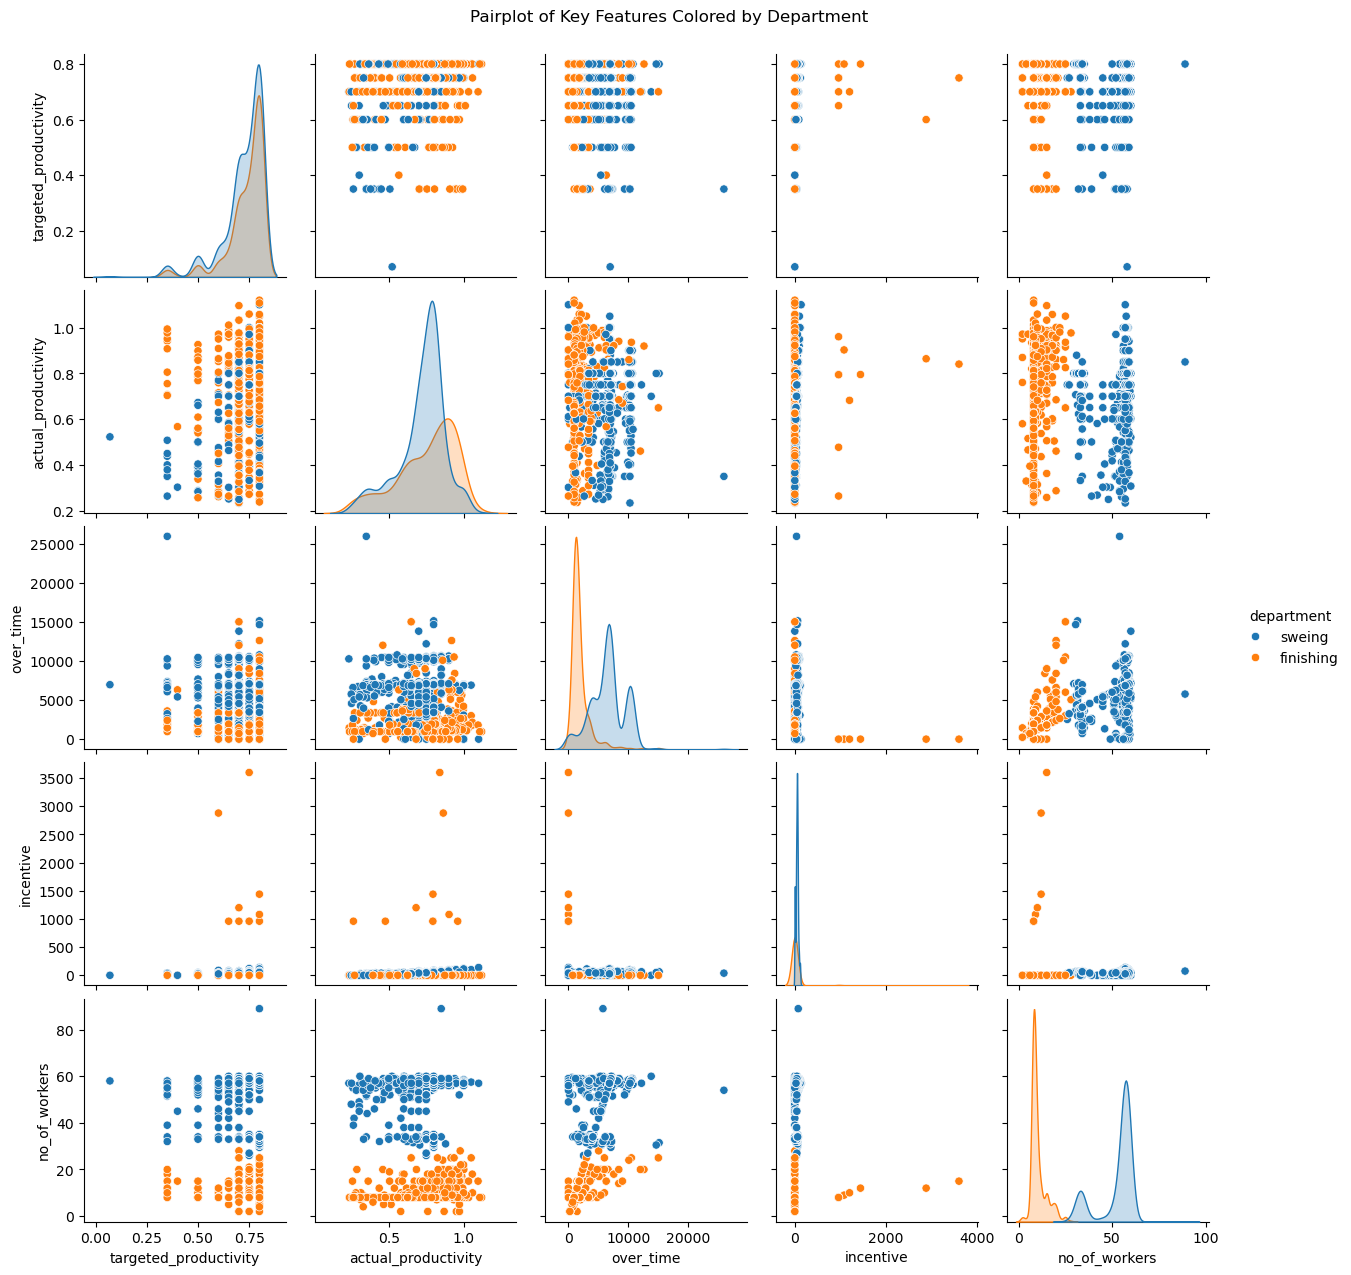

In [10]:
# Include 'department' in the DataFrame used for the pairplot
pairplot_df = df[['targeted_productivity', 'actual_productivity', 'over_time', 'incentive', 'no_of_workers', 'department']]

# Pairplot to visualize relationships and interactions between important numerical features with 'department' as hue
sns.pairplot(pairplot_df, diag_kind='kde', hue='department')
plt.suptitle('Pairplot of Key Features Colored by Department', y=1.02)
plt.show()

The pair plot shows scatter plots of the relationships between pairs of key numerical features in the dataset, with histograms or kernel density estimates on the diagonal. The data points are colored by department (sweing and finishing) to visualize differences between the two departments.

Key Insights:

- Targeted vs. Actual Productivity: There is a slight positive trend where higher targeted productivity tends to align with higher actual productivity. However, the spread of points indicates variability in meeting these targets, especially in the sweing department.
- Over Time and Actual Productivity: For the sweing department, we observe clusters where high overtime does not always translate to high productivity, suggesting inefficiencies or diminishing returns with longer hours. The finishing department shows a more concentrated pattern with less overtime.
- Incentive and Productivity: There is no clear linear relationship between incentives and productivity in either department, indicating that financial incentives alone may not be a strong driver of productivity.
- No of Workers vs. Other Features: The number of workers (no_of_workers) in both departments shows distinct clustering patterns, with the finishing department generally having fewer workers compared to sweing. This could imply differences in task types or production processes between departments.
  
5. Statistical Tests and Insights
Performing statistical tests, such as t-tests or ANOVA, helps in understanding the significance of differences between groups (e.g., different departments or days).

In [11]:
from scipy.stats import f_oneway

# Performing ANOVA to see if there is a significant difference in productivity across different departments
anova_results = f_oneway(df[df['department'] == 'sweing']['actual_productivity'],
                         df[df['department'] == 'finishing']['actual_productivity'])

print('ANOVA results for actual productivity by department:', anova_results)

ANOVA results for actual productivity by department: F_onewayResult(statistic=9.246175421332591, pvalue=0.002411259977623153)


The ANOVA (Analysis of Variance) test results show a significant difference in actual_productivity between the departments (sweing and finishing).

Key Insights:

With a p-value of approximately 0.0024, the ANOVA test indicates that there is a statistically significant difference in mean productivity between the departments. This suggests that department-specific factors may influence productivity levels, warranting further investigation into operational practices, team compositions, or other contextual variables.

#### Column-Wise Exploration of the Dataset

The date column contains the date of each observation in MM/DD/YYYY format. It is essential to convert this column to a datetime format for further analysis, such as identifying trends or patterns over time. This conversion allows for more sophisticated time-based operations, like calculating the difference between dates, extracting month or day information, etc.

In [12]:
# Converting 'date' to datetime format for further time-based analysis
df['date'] = pd.to_datetime(df['date'])

# Viewing the first and last few dates
print("First 5 dates:\n", df['date'].head())
print("\nLast 5 dates:\n", df['date'].tail())

# Checking random samples to ensure consistency in date formatting
print("\nRandom sample of dates:\n", df['date'].sample(20, random_state=14))

# Analyzing date range for missing dates or irregularities
print(f"\nDate Range: {df['date'].min()} to {df['date'].max()}")

First 5 dates:
 0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

Last 5 dates:
 1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, dtype: datetime64[ns]

Random sample of dates:
 959    2015-02-26
464    2015-01-27
672    2015-02-08
321    2015-01-19
282    2015-01-17
307    2015-01-18
609    2015-02-04
1123   2015-03-08
877    2015-02-22
950    2015-02-26
692    2015-02-10
51     2015-01-04
505    2015-01-29
554    2015-02-01
801    2015-02-16
1017   2015-03-02
340    2015-01-20
732    2015-02-12
616    2015-02-04
806    2015-02-17
Name: date, dtype: datetime64[ns]

Date Range: 2015-01-01 00:00:00 to 2015-03-11 00:00:00


The quarter column divides each month into four parts rather than the typical financial quarters. This column's non-standard categorization can be misleading and requires a closer look. We need to identify any irregular values (like Quarter5) and decide whether to adjust or keep them for further analysis.

In [13]:
# Displaying the count of each quarter
print("Count of each 'quarter' category:\n", df['quarter'].value_counts())

# Identifying irregular entries in 'quarter'
print("\nObservations with Quarter5 classification:\n", df[df['quarter'] == "Quarter5"])

# Correcting any anomalies or misclassifications (if needed)
# Example: Replacing 'Quarter5' with 'Quarter4' or flagging for further investigation
df['quarter'] = df['quarter'].replace("Quarter5", "Quarter4")  # Adjust as necessary

Count of each 'quarter' category:
 quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Observations with Quarter5 classification:
           date   quarter department       day  team  targeted_productivity  \
498 2015-01-29  Quarter5     sweing  Thursday     2                   0.80   
499 2015-01-29  Quarter5  finishing  Thursday     4                   0.80   
500 2015-01-29  Quarter5     sweing  Thursday     3                   0.80   
501 2015-01-29  Quarter5     sweing  Thursday     4                   0.80   
502 2015-01-29  Quarter5     sweing  Thursday    10                   0.80   
503 2015-01-29  Quarter5  finishing  Thursday     6                   0.50   
504 2015-01-29  Quarter5  finishing  Thursday     8                   0.65   
505 2015-01-29  Quarter5  finishing  Thursday    11                   0.60   
506 2015-01-29  Quarter5  finishing  Thursday    10                   0.80   
507 2015-01-29  Quarter5  

The department column specifies whether the observation is from the sweing or finishing department. However, there are inconsistencies like trailing spaces in some entries (finishing vs. finishing ). These inconsistencies must be addressed to ensure correct analysis.

In [14]:
# Display unique values and their counts
print("Unique department values before cleaning:\n", df['department'].value_counts())

# Removing trailing whitespaces or correcting inconsistent entries
df['department'] = df['department'].str.strip()

# Recheck unique values after cleaning
print("\nUnique department values after cleaning:\n", df['department'].unique())


Unique department values before cleaning:
 department
sweing       691
finishing    506
Name: count, dtype: int64

Unique department values after cleaning:
 ['sweing' 'finishing']


The day column represents the day of the week. A quick check shows no entries for Fridays, which could imply missing data or indicate that the factory is closed on Fridays. This requires verification.

In [15]:
# Display count of each day
print("Count of observations for each day of the week:\n", df['day'].value_counts())

# Investigate the absence of Friday entries
# Could be due to a factory holiday or missing data - requires confirmation with domain knowledge

Count of observations for each day of the week:
 day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


The team column categorizes observations by team number. Analyzing the distribution of teams can provide insights into team-based productivity differences and allow us to look for any correlations between team number and productivity.

In [16]:
# Displaying the count of observations per team sorted by team number
print("Team-wise count of observations:\n", df['team'].value_counts().sort_index())

# Checking if team-specific attributes (like the number of workers) affect productivity
print("\nAverage actual productivity by team:\n", df.groupby('team')['actual_productivity'].mean())

Team-wise count of observations:
 team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: count, dtype: int64

Average actual productivity by team:
 team
1     0.821054
2     0.770855
3     0.803880
4     0.770035
5     0.697981
6     0.685385
7     0.668006
8     0.674148
9     0.734462
10    0.719736
11    0.681985
12    0.779055
Name: actual_productivity, dtype: float64


targeted_productivity & actual_productivity Columns are crucial for performance analysis. They allow us to identify which observations exceeded, met, or fell short of the productivity targets, providing insights into overall performance trends.

In [17]:
# Finding instances where actual productivity is higher than targeted
higher_than_target = df[df['actual_productivity'] > df['targeted_productivity']]
print("\nInstances where actual productivity exceeded target:\n", higher_than_target)

# Instances where actual productivity exactly matches targeted
exact_match = df[df['actual_productivity'] == df['targeted_productivity']]
print("\nInstances where actual productivity matches the target:\n", exact_match)

# Instances where actual productivity is below targeted
below_target = df[df['actual_productivity'] < df['targeted_productivity']]
print("\nInstances where actual productivity fell short of the target:\n", below_target)

# Checking if actual productivity exceeds 1 (data inconsistency check)
above_one = df[df['actual_productivity'] > 1]
print("\nInstances where actual productivity exceeds 1:\n", above_one)


Instances where actual productivity exceeded target:
            date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2    2015-01-01  Quarter1     sweing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sweing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sweing   Thursday     6                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1187 2015-03-11  Quarter2     sweing  Wednesday     4                   0.75   
1188 2015-03-11  Quarter2     sweing  Wednesday     5                   0.70   
1189 2015-03-11  Quarter2     sweing  Wednesday     8                   0.70   
1190 2015-03-11  Quarter2     sweing  Wednesday     6                   0.70   
1191 2015-03-11  Quarter2     sweing  Wednesday     7            

The wip column contains the number of unfinished items. It is the only column with missing values. Handling these missing values is necessary to avoid data issues in further analysis.

In [18]:
# Filtering observations with non-null WIP values
wip_non_null = df[df['wip'].notnull()]
print("\nObservations with non-null WIP values:\n", wip_non_null)

# Handling missing WIP values - either remove or impute
# Example: Imputing missing values with mean
df['wip'].fillna(df['wip'].mean(), inplace=True)


Observations with non-null WIP values:
            date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
2    2015-01-01  Quarter1     sweing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sweing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sweing   Thursday     6                   0.80   
5    2015-01-01  Quarter1     sweing   Thursday     7                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1187 2015-03-11  Quarter2     sweing  Wednesday     4                   0.75   
1188 2015-03-11  Quarter2     sweing  Wednesday     5                   0.70   
1189 2015-03-11  Quarter2     sweing  Wednesday     8                   0.70   
1190 2015-03-11  Quarter2     sweing  Wednesday     6                   0.70   
1191 2015-03-11  Quarter2     sweing  Wednesday     7                   0.65   

over_time: This column records the amount of overtime in minutes. Analyzing high and low overtime observations could reveal patterns that affect productivity, team efficiency, or even fatigue.

In [19]:
# Descriptive statistics for overtime
print("Descriptive statistics for 'over_time':\n", df['over_time'].describe())

# Filtering entries where overtime exceeds the median
overtime_above_median = df[df['over_time'] > df['over_time'].median()]
print("\nEntries with overtime above the 50th percentile:\n", overtime_above_median)

# Checking entries with no overtime
no_overtime = df[df['over_time'] == 0]
print("\nEntries with no overtime:\n", no_overtime)

Descriptive statistics for 'over_time':
 count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Entries with overtime above the 50th percentile:
            date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
5    2015-01-01  Quarter1     sweing   Thursday     7                   0.80   
7    2015-01-01  Quarter1     sweing   Thursday     3                   0.75   
8    2015-01-01  Quarter1     sweing   Thursday     2                   0.75   
9    2015-01-01  Quarter1     sweing   Thursday     1                   0.75   
...         ...       ...        ...        ...   ...                    ...   
1187 2015-03-11  Quarter2     sweing  Wednesday     4                   0.75   
1188 2015-03-11  Quarter2     sweing  Wednesday     5       

incentive : This column reflects the monetary incentives provided to the teams. Analyzing incentives can help understand their impact on productivity and whether they are effectively used.

In [20]:
# Descriptive statistics for incentives
print("Descriptive statistics for 'incentive':\n", df['incentive'].describe())

# Observations without incentives
no_incentives = df[df['incentive'] == 0]
print("\nObservations without incentives:\n", no_incentives)

# Observations with high incentives (e.g., > 100)
high_incentives = df[df['incentive'] > 100]
print("\nObservations with incentives greater than 100:\n", high_incentives)

Descriptive statistics for 'incentive':
 count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

Observations without incentives:
            date   quarter department        day  team  targeted_productivity  \
1    2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
6    2015-01-01  Quarter1  finishing   Thursday     2                   0.75   
13   2015-01-01  Quarter1  finishing   Thursday    10                   0.65   
14   2015-01-01  Quarter1  finishing   Thursday     8                   0.75   
15   2015-01-01  Quarter1  finishing   Thursday     4                   0.75   
...         ...       ...        ...        ...   ...                    ...   
1192 2015-03-11  Quarter2  finishing  Wednesday    10                   0.75   
1193 2015-03-11  Quarter2  finishing  Wednesday     8                   0.70   
1194

idle_time & idle_men Columns: Both columns represent idle time and the number of idle men, respectively. These columns help understand downtime in production. Any inconsistency between these two could indicate a data issue.

In [21]:
# Observations where there was idle time
idle_time_entries = df[df['idle_time'] > 0]
print("\nObservations with idle time:\n", idle_time_entries)

# Checking for inconsistencies where idle time exists but idle men is zero
idle_inconsistencies = df[(df['idle_time'] > 0) & (df['idle_men'] == 0)]
print("\nInconsistencies where idle time exists but idle men is zero:\n", idle_inconsistencies)

# Observations where idle men is greater than zero
idle_men_entries = df[df['idle_men'] > 0]
print("\nObservations with idle men:\n", idle_men_entries)


Observations with idle time:
            date   quarter department        day  team  targeted_productivity  \
615  2015-02-04  Quarter1     sweing  Wednesday     5                   0.65   
617  2015-02-04  Quarter1     sweing  Wednesday     4                   0.35   
650  2015-02-07  Quarter1     sweing   Saturday     7                   0.70   
654  2015-02-07  Quarter1     sweing   Saturday     8                   0.70   
775  2015-02-15  Quarter3     sweing     Sunday     8                   0.70   
798  2015-02-16  Quarter3     sweing     Monday     8                   0.70   
818  2015-02-17  Quarter3     sweing    Tuesday     8                   0.60   
822  2015-02-17  Quarter3     sweing    Tuesday    10                   0.65   
841  2015-02-18  Quarter3     sweing  Wednesday    10                   0.70   
843  2015-02-18  Quarter3     sweing  Wednesday     8                   0.65   
848  2015-02-19  Quarter3     sweing   Thursday     5                   0.80   
860  2015

no_of_style_change: This column indicates the number of style changes. Style changes can impact productivity, especially if they are frequent. The goal is to analyze if changes correlate with productivity drops.

In [22]:
# Descriptive statistics for style changes
print("Descriptive statistics for 'no_of_style_change':\n", df['no_of_style_change'].describe())

# Observations with at least one style change
style_change_one = df[df['no_of_style_change'] == 1]
print("\nObservations with one style change:\n", style_change_one)

# Observations with two style changes
style_change_two = df[df['no_of_style_change'] == 2]
print("\nObservations with two style changes:\n", style_change_two)

Descriptive statistics for 'no_of_style_change':
 count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

Observations with one style change:
            date   quarter department        day  team  targeted_productivity  \
634  2015-02-05  Quarter1     sweing   Thursday     4                   0.50   
651  2015-02-07  Quarter1     sweing   Saturday     4                   0.60   
671  2015-02-08  Quarter2     sweing     Sunday     4                   0.65   
683  2015-02-09  Quarter2     sweing     Monday     4                   0.70   
689  2015-02-09  Quarter2     sweing     Monday     7                   0.35   
...         ...       ...        ...        ...   ...                    ...   
1185 2015-03-11  Quarter2     sweing  Wednesday     2                   0.75   
1188 2015-03-11  Quarter2     sweing  Wednesday     5          

no_of_workers: This column represents the number of workers in a team. Analyzing teams with very high or very low numbers of workers can help identify any correlation between the team size and productivity. We can also perform a "sanity check" to ensure that there are no observations with zero workers.

Descriptive statistics for 'no_of_workers':
 count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

Observations with number of workers above the 75th percentile:
            date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
7    2015-01-01  Quarter1     sweing   Thursday     3                   0.75   
9    2015-01-01  Quarter1     sweing   Thursday     1                   0.75   
10   2015-01-01  Quarter1     sweing   Thursday     9                   0.70   
17   2015-01-01  Quarter1     sweing   Thursday     4                   0.65   
...         ...       ...        ...        ...   ...                    ...   
1179 2015-03-11  Quarter2     sweing  Wednesday     3                   0.80   
1180 2015-03-11  Quarter2     sweing  Wednesda

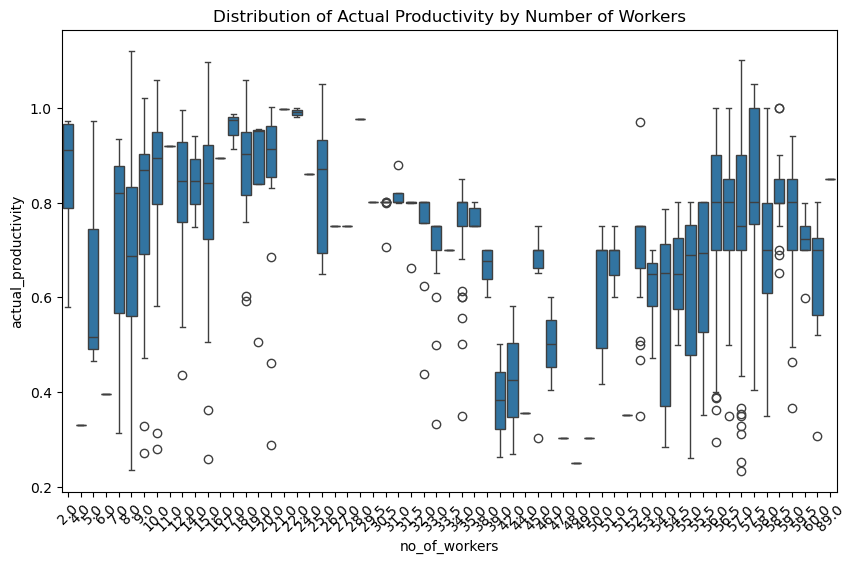

In [23]:
# Descriptive statistics for the number of workers
print("Descriptive statistics for 'no_of_workers':\n", df['no_of_workers'].describe())

# Observations where the number of workers is above the 75th percentile
high_workers = df[df['no_of_workers'] > 57]  # Using the 75th percentile value
print("\nObservations with number of workers above the 75th percentile:\n", high_workers)

# Checking for incorrect entries with zero workers
zero_workers = df[df['no_of_workers'] == 0]
print("\nObservations with zero workers (sanity check):\n", zero_workers)

# Additional: Analyzing correlation between number of workers and productivity
print("\nCorrelation between 'no_of_workers' and 'actual_productivity':")
print(df[['no_of_workers', 'actual_productivity']].corr())

# Additional: Distribution of productivity based on the number of workers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='no_of_workers', y='actual_productivity')
plt.title('Distribution of Actual Productivity by Number of Workers')
plt.xticks(rotation=45)
plt.show()

#### Additional Considerations for Analysis

Beyond individual column analysis, it's essential to consider interactions between multiple columns. This step involves looking for multicollinearity, understanding combined effects, and ensuring that the dataset is ready for more advanced machine learning models.

In [24]:
# Additional Feature Engineering: Create new potential feature
# 'worker_efficiency' as a ratio of actual productivity to the number of workers
df['worker_efficiency'] = df['actual_productivity'] / df['no_of_workers']
print("\nPreview of new feature 'worker_efficiency':\n", df[['actual_productivity', 'no_of_workers', 'worker_efficiency']].head())

# Analyzing the new feature's correlation with productivity
print("\nCorrelation between 'worker_efficiency' and 'actual_productivity':")
print(df[['worker_efficiency', 'actual_productivity']].corr())


Preview of new feature 'worker_efficiency':
    actual_productivity  no_of_workers  worker_efficiency
0             0.940725           59.0           0.015944
1             0.886500            8.0           0.110812
2             0.800570           30.5           0.026248
3             0.800570           30.5           0.026248
4             0.800382           56.0           0.014293

Correlation between 'worker_efficiency' and 'actual_productivity':
                     worker_efficiency  actual_productivity
worker_efficiency             1.000000             0.280667
actual_productivity           0.280667             1.000000


The moderate correlation (0.28) between worker_efficiency and actual_productivity indicates that while the productivity per worker is a meaningful metric, it isn't the sole predictor of overall productivity. This suggests that team dynamics, task complexity, or other factors also play roles.

#### Data Cleaning (I)

After thoroughly exploring each column, we can now proceed with the data cleaning process to ensure our dataset is ready for machine learning models like Decision Trees. In this section, we will clean up inconsistencies, handle missing values, and simplify the dataset's structure for more effective analysis.

The 'department' column contains inconsistent values like 'finishing' and 'finishing ' (with a trailing space). We cleaned this up before and replaced the incorrect values with the correct one.

The 'date' column provides limited utility for our analysis since it spans only a three-month period. To simplify the dataset, we can remove this column. However, if interested in exploring potential time-based patterns, you could keep it and derive additional features.

In [25]:
# Dropping 'date' column
df.drop('date', axis=1, inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,worker_efficiency
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,0.015944
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,0.110812
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,0.026248
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,0.026248
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,0.014293


The 'quarter' column includes an unnecessary "Quarter" text. Additionally, there is a 'Quarter5' category that only represents a couple of days. We can merge 'Quarter5' with 'Quarter4' and convert the column to integer values for easier handling.

In [26]:
# Merging 'Quarter5' into 'Quarter4' and cleaning up the 'quarter' column
df['quarter'] = df['quarter'].replace('Quarter5', 'Quarter4')
df['quarter'] = df['quarter'].apply(lambda x: int(x[-1]))  # Extracting just the numeric part
df['quarter'].value_counts()

quarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64

'idle_time' & 'idle_men' Columns: These columns contain only 18 observations with non-zero values, providing minimal information. We will remove them to reduce noise in the dataset.

'wip' Column: The 'wip' column has many missing values, and it is unclear whether an empty cell indicates zero unfinished products or missing data. Due to this ambiguity, we will drop it.

'no_of_style_change' Column: With only 147 observations where style changes occurred, this column provides minimal variance and can also be removed.

In [27]:
# Dropping low-information columns
df.drop(['idle_time', 'idle_men', 'wip', 'no_of_style_change'], axis=1, inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,worker_efficiency
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725,0.015944
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500,0.110812
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570,0.026248
3,1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570,0.026248
4,1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382,0.014293


The 'no_of_workers' column contains float values, which does not make sense since the number of workers should be a whole number. We will convert this column to integer type.

In [28]:
# Converting 'no_of_workers' to integer
df['no_of_workers'] = df['no_of_workers'].astype(int)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,worker_efficiency
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725,0.015944
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500,0.110812
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30,0.800570,0.026248
3,1,sweing,Thursday,12,0.80,11.41,3660,50,30,0.800570,0.026248
4,1,sweing,Thursday,6,0.80,25.90,1920,50,56,0.800382,0.014293


To keep the format consistent with 'targeted_productivity,' we will round 'actual_productivity' to two decimal places.

In [29]:
# Rounding 'actual_productivity' to two decimal places
df['actual_productivity'] = df['actual_productivity'].round(2)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,worker_efficiency
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94,0.015944
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89,0.110812
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30,0.80,0.026248
3,1,sweing,Thursday,12,0.80,11.41,3660,50,30,0.80,0.026248
4,1,sweing,Thursday,6,0.80,25.90,1920,50,56,0.80,0.014293


Since we are building a Classification Tree, the target column 'actual_productivity' must be categorical. We will create a new column named 'productive' with Boolean values indicating whether the team met or exceeded their productivity targets.

In [30]:
# Creating a binary target column 'productive'
df['productive'] = df['actual_productivity'] >= df['targeted_productivity']
df.sample(10, random_state=14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,worker_efficiency,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,0.051354,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,0.105682,True
672,2,sweing,Sunday,7,0.70,24.26,6960,0,58,0.36,0.006130,False
321,3,sweing,Monday,6,0.80,11.41,4380,50,31,0.80,0.025818,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,0.082680,True
307,3,sweing,Sunday,10,0.70,22.52,10080,40,56,0.70,0.012502,True
609,1,finishing,Wednesday,9,0.75,3.94,960,0,8,0.76,0.094396,True
1123,2,sweing,Sunday,8,0.60,30.48,6720,0,56,0.60,0.010724,True
877,4,sweing,Sunday,9,0.70,18.79,3240,30,57,0.63,0.011000,False
950,4,sweing,Thursday,3,0.75,29.40,6840,45,57,0.75,0.013166,True


Finally, we reorder the columns to make the dataset easier to navigate and analyze.

In [31]:
# Reordering columns
df = df[['quarter', 'day', 'department', 'team', 'no_of_workers', 'targeted_productivity', 'actual_productivity', 
         'productive', 'over_time', 'smv', 'incentive']]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,True,1920,25.90,50


#### Data Cleaning (II)

We now focus on encoding categorical variables to prepare them for machine learning algorithms.

The 'department' column has binary values ('sweing' and 'finishing'). We will encode it as 0 and 1 and rename the column for clarity.

In [32]:
# Encoding 'department' as a boolean and renaming the column
df['department'] = df['department'].map({'finishing': 0, 'sweing': 1})
df.rename(columns={'department': 'dept_sweing'}, inplace=True)
df.head(10)

C:\Users\mexic\AppData\Local\Temp\ipykernel_19564\1713502945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].map({'finishing': 0, 'sweing': 1})
C:\Users\mexic\AppData\Local\Temp\ipykernel_19564\1713502945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'department': 'dept_sweing'}, inplace=True)


,quarter,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,1,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,0,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,1,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,1,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,1,6,56,0.80,0.80,True,1920,25.90,50
5,1,Thursday,1,7,56,0.80,0.80,True,6720,25.90,38
6,1,Thursday,0,2,8,0.75,0.76,True,960,3.94,0
7,1,Thursday,1,3,57,0.75,0.75,True,6900,28.08,45
8,1,Thursday,1,2,55,0.75,0.75,True,6000,19.87,34
9,1,Thursday,1,1,57,0.75,0.75,True,6900,28.08,45


For the 'quarter' column, we will generate dummy variables since treating them as ordinal values would lead to incorrect assumptions by the Decision Tree model. The same logic applies to the 'day' column.

In [33]:
# Creating dummy variables for 'quarter' and 'day'
df = pd.get_dummies(df, columns=['quarter'], prefix='q')
df = pd.get_dummies(df, columns=['day'], prefix='', prefix_sep='')
df.sample(10, random_state=42)

,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
921,1,1,42,0.60,0.27,False,5040,22.53,0,False,False,False,True,False,False,False,False,True,False
321,1,6,31,0.80,0.80,True,4380,11.41,50,False,False,True,False,True,False,False,False,False,False
101,0,8,8,0.80,0.68,False,1440,2.90,0,True,False,False,False,False,False,False,False,True,False
920,0,2,8,0.70,0.32,False,960,3.90,0,False,False,False,True,False,False,False,False,True,False
58,0,7,8,0.80,0.67,False,960,2.90,0,True,False,False,False,False,False,True,False,False,False
790,1,5,59,0.80,0.80,True,0,30.10,0,False,False,True,False,True,False,False,False,False,False
948,0,1,8,0.50,0.77,True,3360,3.94,0,False,False,False,True,False,False,False,True,False,False
969,0,1,8,0.50,0.77,True,3360,3.94,0,False,False,False,True,False,True,False,False,False,False
410,1,7,56,0.65,0.65,True,10170,22.52,26,False,False,False,True,False,True,False,False,False,False
1079,1,9,52,0.75,0.75,True,6240,18.79,45,True,False,False,False,False,False,False,True,False,False


The 'team' column will receive the same treatment. Since there are 12 teams, this will add 12 additional columns to the dataset.

In [34]:
# Creating dummy variables for 'team'
df = pd.get_dummies(df, columns=['team'], prefix='team')
df.sample(10, random_state=14)

,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,0,8,0.70,0.41,False,3360,2.90,0,False,False,...,False,False,False,False,False,False,False,True,False,False
464,0,8,0.65,0.85,True,960,3.94,0,False,False,...,False,False,False,False,False,True,False,False,False,False
672,1,58,0.70,0.36,False,6960,24.26,0,False,True,...,False,False,False,False,True,False,False,False,False,False
321,1,31,0.80,0.80,True,4380,11.41,50,False,False,...,False,False,False,True,False,False,False,False,False,False
282,0,10,0.80,0.83,True,1800,3.94,0,False,False,...,False,False,False,False,False,False,True,False,False,False
307,1,56,0.70,0.70,True,10080,22.52,40,False,False,...,False,False,False,False,False,False,False,True,False,False
609,0,8,0.75,0.76,True,960,3.94,0,True,False,...,False,False,False,False,False,False,True,False,False,False
1123,1,56,0.60,0.60,True,6720,30.48,0,False,True,...,False,False,False,False,False,True,False,False,False,False
877,1,57,0.70,0.63,False,3240,18.79,30,False,False,...,False,False,False,False,False,False,True,False,False,False
950,1,57,0.75,0.75,True,6840,29.40,45,False,False,...,True,False,False,False,False,False,False,False,False,False


After all transformations, we now have a well-prepared dataset for building machine learning models.

In [35]:
# Checking the final DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept_sweing            1197 non-null   int64  
 1   no_of_workers          1197 non-null   int32  
 2   targeted_productivity  1197 non-null   float64
 3   actual_productivity    1197 non-null   float64
 4   productive             1197 non-null   bool   
 5   over_time              1197 non-null   int64  
 6   smv                    1197 non-null   float64
 7   incentive              1197 non-null   int64  
 8   q_1                    1197 non-null   bool   
 9   q_2                    1197 non-null   bool   
 10  q_3                    1197 non-null   bool   
 11  q_4                    1197 non-null   bool   
 12  Monday                 1197 non-null   bool   
 13  Saturday               1197 non-null   bool   
 14  Sunday                 1197 non-null   bool   
 15  Thur

In [36]:
# Checking the final DataFrame
df.head()

,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,59,0.80,0.94,True,7080,26.16,98,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0,8,0.75,0.89,True,960,3.94,0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,30,0.80,0.80,True,3660,11.41,50,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,30,0.80,0.80,True,3660,11.41,50,True,False,...,False,False,False,False,False,False,False,False,False,True
4,1,56,0.80,0.80,True,1920,25.90,50,True,False,...,False,False,False,True,False,False,False,False,False,False


#### Building the Tree:
In this section, we build a Decision Tree model to predict whether teams will be productive or not. We evaluate the model's performance using accuracy and visualize the tree to understand its decision-making process.

1. Feature and Target Columns

We define the feature matrix X by removing the actual_productivity column from the DataFrame, as it would be the target column in a Regression Tree, and define y as the productive column, which is a boolean representation of whether productivity targets were achieved.

In [37]:
# Feature and target columns
X = df.drop(["actual_productivity", "productive"], axis=1)
y = df["productive"]

# Sanity check: first two observations of "X"
X.head(2)

,dept_sweing,no_of_workers,targeted_productivity,over_time,smv,incentive,q_1,q_2,q_3,q_4,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,59,0.80,7080,26.16,98,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,8,0.75,960,3.94,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


2. Splitting the Data
   
To train and evaluate the model properly, we split the dataset into training and test sets using train_test_split. We keep 20% of the data as the test set and set a random_state for reproducibility.

In [38]:
# Dividing into training and test sets with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=24)

3. Instantiating and Fitting the Decision Tree Classifier

We create a Decision Tree classifier with a maximum depth of 3 to prevent overfitting. The model is then trained using the training data

In [39]:
# Instantiating and fitting the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=24)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

4. Making Predictions and Evaluating the Tree

We use the trained Decision Tree model to make predictions on the test set and evaluate its performance using accuracy. We also calculate the [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Making predictions on the test set
y_pred = tree.predict(X_test)

# Calculating evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

Accuracy: 0.85
Precision: 0.88
Recall: 0.93
F1 Score: 0.9


5. Visualizing the Decision Tree
   
We use plot_tree from sklearn to visualize the decision tree. This helps understand the splits and the criteria the model uses to make predictions.

In [41]:
# We'll transform them to ["Unproductive", "Productive"]
tree.classes_ 

array([False,  True])

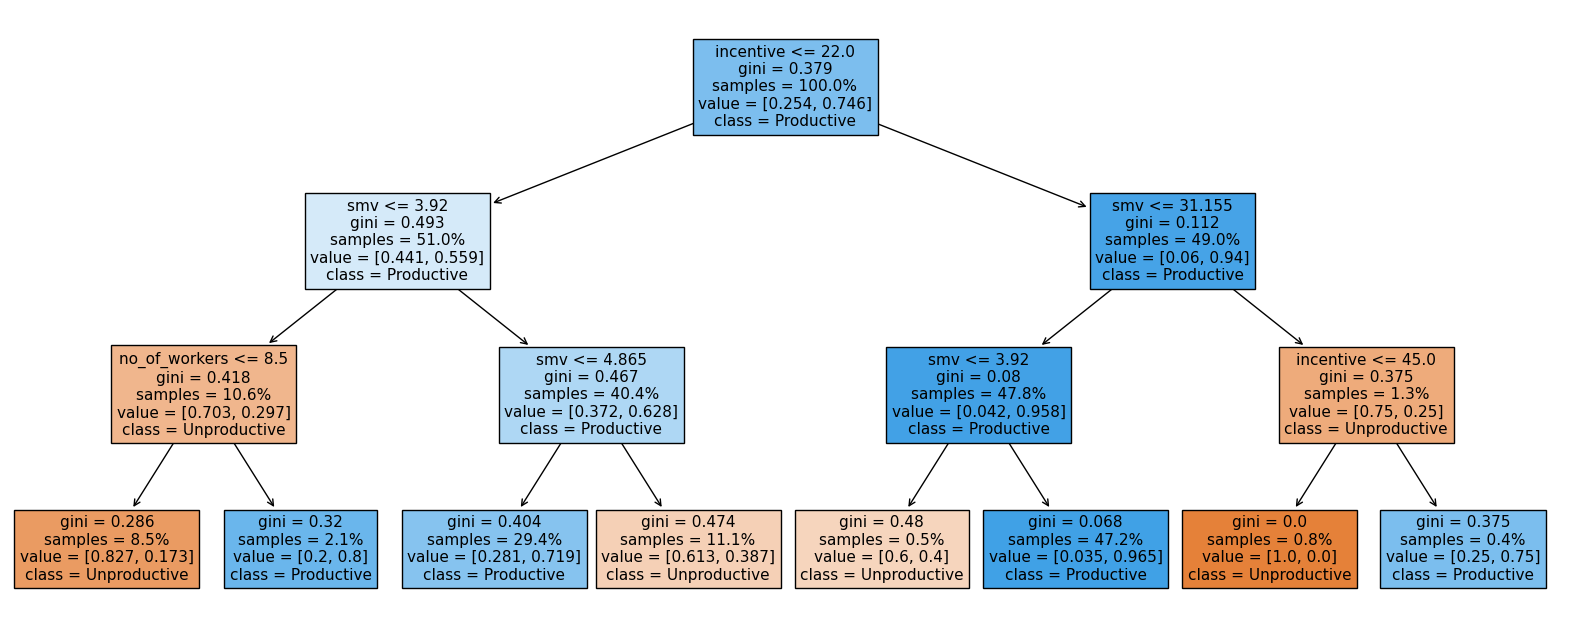

In [42]:
# Visualizing the Decision Tree
# Setting plot size
plt.figure(figsize=(20, 8))

# Plotting the tree with some specific parameters
_ = plot_tree(tree, 
              feature_names=X.columns.tolist(), 
              class_names=["Unproductive", "Productive"],
              filled=True, 
              rounded=False, 
              proportion=True,
              fontsize=11)

plt.show()

#### Interpretation of the Decision Tree

The Decision Tree visualization helps us understand the most significant factors influencing productivity predictions in our dataset. The tree starts with a root node at the top, where the first decision (or split) is made, and it ends with leaf nodes at the bottom, where the final predictions are shown.

Key Observations from the Tree:
Most Significant Features:
From the visualization, we can see that the most influential features in determining productivity are "incentive" (the financial motivation provided to the team) and "smv" (Standard Minute Value, representing the allocated time for a specific task). These two features appear most frequently in the decision nodes, meaning they have the most predictive power in distinguishing between productive and unproductive outcomes.

Tree Pruning to Prevent Overfitting:
The tree was pruned by setting a maximum depth of 3 when we instantiated the model. This was done to avoid overfitting, where the model might perform exceptionally well on training data but poorly on unseen data. If we hadn't limited the depth, the tree could have further branched out using other features, potentially capturing noise rather than meaningful patterns.

Understanding the Decision Rules:
The Decision Tree can be used to predict the class (Productive or Unproductive) of any new observation by following the splits from the top (root) to a bottom leaf. Let’s consider an example of a hypothetical team with an "incentive" of 24 and an "smv" of 5. Here’s how we would make a prediction:

First Split (Root Node):
The root node checks if "incentive" <= 22. Since 24 > 22, this evaluates to False, and we follow the path to the right child node (False branches always go to the right).

Second Split (First Child Node):
At the right child node, the decision is based on "smv <= 31.155". Given that 5 <= 31.155, this evaluates to True, and we follow the path to the left child node (True branches always go to the left).

Final Split Before the Leaf (Second Child Node):
At this point, the decision checks "smv <= 3.92". Here, 5 > 3.92, so the condition evaluates to False. We follow the path to the right, reaching the final leaf node.

Final Prediction (Leaf Node):
The leaf node reached has the label "Productive", meaning that for an observation with an incentive of 24 and an smv of 5, the model predicts the team will be Productive.

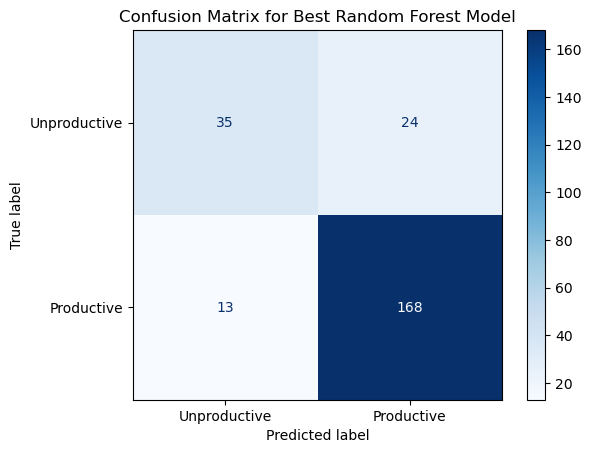

In [43]:
# Plotting the Confusion Matrix
# Generate confusion matrix for the Decision Tree model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Unproductive", "Productive"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

The confusion matrix for the Decision Tree model provides insights into how well the model is performing in classifying the "Productive" and "Unproductive" classes:

- True Positives (TP): 168 - The model correctly predicted 168 instances as "Productive."
- True Negatives (TN): 35 - The model correctly predicted 35 instances as "Unproductive."
- False Positives (FP): 24 - The model incorrectly predicted 24 instances as "Productive" when they were actually "Unproductive."
- False Negatives (FN): 13 - The model incorrectly predicted 13 instances as "Unproductive" when they were actually "Productive."

Overall, the confusion matrix indicates that the Decision Tree model performs well, with more accurate predictions for the "Productive" class than the "Unproductive" class.

- - -

To further assess the robustness of our Decision Tree model, we can use [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). This technique provides a more comprehensive evaluation by partitioning the dataset into a specified number of subsets, known as folds (controlled by the "cv" parameter). The model is trained on cv-1 folds and validated on the remaining fold. This process is repeated cv times, with each fold being used exactly once as the validation set.

Cross-Validation helps in obtaining a more reliable estimate of the model's performance by ensuring that each data point gets to be in the test set exactly once, thereby reducing the likelihood of random chance influencing the evaluation. The result is a list of performance scores across all iterations, providing a clearer picture of the model's stability and generalization ability.

For clarity, we present the cross-validation results with values rounded to two decimal places.

In [44]:
# Performing Cross-Validation
scores = cross_val_score(tree, X, y, cv=10)
print("Cross-Validation Accuracy Scores:", scores.round(2))
print("Mean Cross-Validation Score:", scores.mean().round(2))

# Calculating Cross-Validated metrics for precision, recall, and F1 score
multiple_cross_scores = cross_validate(tree, X, y, cv=10, scoring=("precision", "recall", "f1"))
print("Mean Cross-Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross-Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross-Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Cross-Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]
Mean Cross-Validation Score: 0.82
Mean Cross-Validated Precision: 0.85
Mean Cross-Validated Recall: 0.92
Mean Cross-Validated F1: 0.88


As we can see, after double checking with Cross Validate, we're still getting impressive metrics. This is excellent!

#### Explaining the Tree

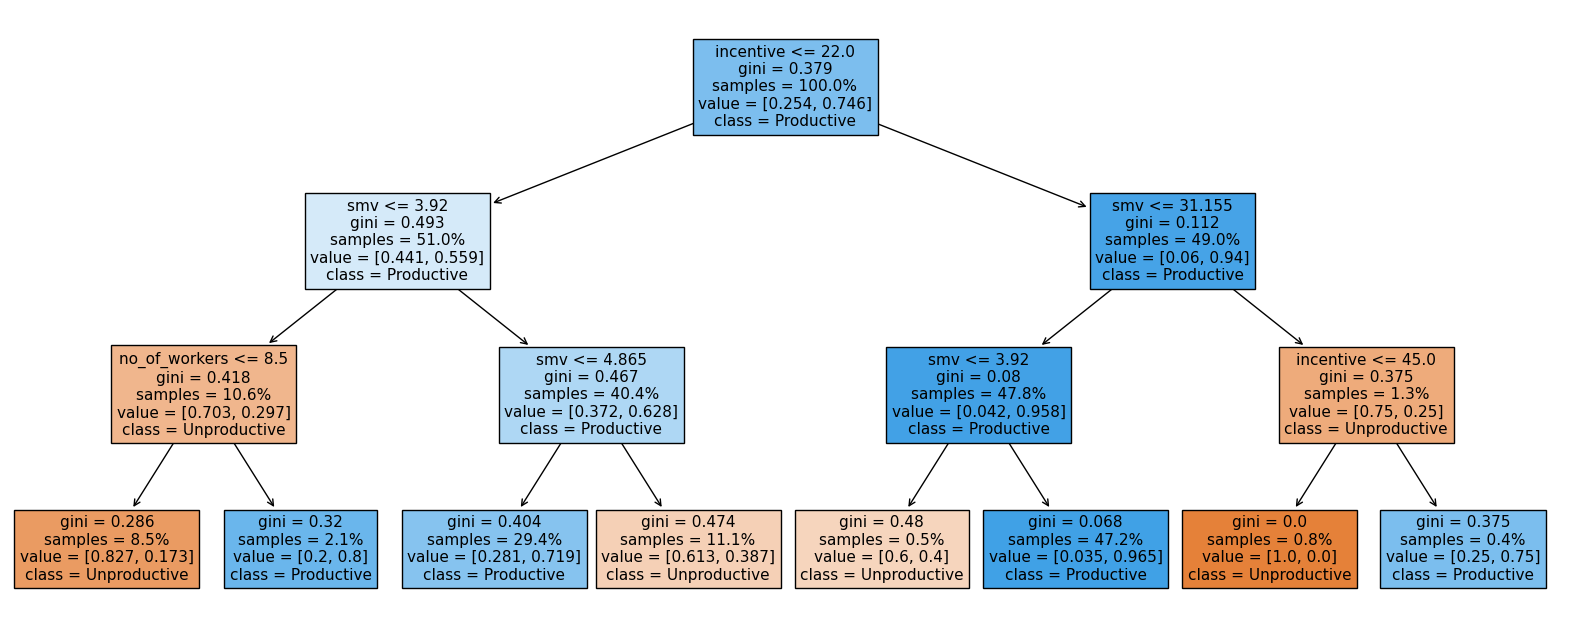

In [45]:
plt.figure(figsize =(20.0, 8.0))

_ = plot_tree(tree, 
              feature_names = X.columns.tolist(), 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

#### Understanding the Decision Tree Visualization

After confirming that our Decision Tree model performs well, it is crucial to convey these insights to decision-makers who may not be familiar with machine learning concepts. The following explanation is designed to make the tree's decisions more accessible, assuming no prior knowledge of Decision Trees.

The Decision Tree graphic below was generated based on the predictions made by our model. Although it may appear complex at first glance, you'll soon be interpreting the results in just a few minutes!

In this visualization, each box represents a decision point or a final outcome. The boxes at the top are called "nodes", which represent the most significant factors that influence productivity in the factory—like the amount of financial incentive (incentive) or the time allocated for tasks (smv or Standard Minute Value). The branches connecting the boxes show the decision-making process, determining whether a team is likely to be productive or not. The boxes at the bottom are known as "leaves"; they represent the final predictions made by the tree for different scenarios.

The tree splits the dataset at each node using specific criteria—these criteria are displayed at the top of each box. For example, at the very top (the root), the model first considers whether the incentive is less than or equal to 22. If it is, the tree follows the left branch; if not, it moves to the right. This process continues until it reaches a leaf, where the final decision is made (either "Productive" or "Unproductive").

#### How to Read the Tree: Step-by-Step

Let's walk through a hypothetical scenario to illustrate how this tree works:

Starting Point (Root Node): Imagine we want to predict if a team will be productive or not, given they have an incentive of 24 and an smv of 5. The first decision point is whether the incentive is less than or equal to 22. Since 24 is greater than 22, we move to the right branch.

Next Decision Point: Now, the tree asks if smv is less than or equal to 31.155. Our smv is 5, which is less than 31.155, so we follow the left branch.

Final Decision Point: At the next node, the tree checks if smv is less than or equal to 3.92. In our case, smv is 5, which is greater than 3.92, so we follow the right branch once more.

Reaching a Leaf Node: Now, we have reached a leaf that indicates the final prediction. Here, the leaf classifies the team as "Productive".

**What Does This Mean?**

This example demonstrates that our model has determined that a team with an incentive of 24 and an smv of 5 is likely to be productive. The tree's decisions are guided by finding the most distinguishing factors at each step, which is why the model is called a Decision Tree.

In summary, the Decision Tree not only helps us understand which factors most influence productivity (in this case, incentive and smv), but it also allows us to make predictions by simply following the tree's paths with our own data inputs. This is the power of Decision Trees—enabling us to use data-driven decisions in an intuitive and interpretable way.

#### Using Random Forest

We use a Random Forest to validate and compare the results of our Decision Tree model. Random Forests aggregate multiple decision trees and often perform better by reducing overfitting.

1. Building the Random Forest Classifier
We instantiate a Random Forest classifier and train it on the training data. We also use Out-of-Bag (OOB) scoring to validate the performance of the model on unseen data.

In [46]:
# Instantiating and fitting the Random Forest
forest = RandomForestClassifier(oob_score=True, random_state=24)
forest.fit(X_train, y_train)

# Predicting using the Random Forest
y_pred_forest = forest.predict(X_test)

# Evaluating accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred_forest), 2))

Accuracy: 0.85


2. Checking the Out-Of-Bag (OOB) Score
The OOB score provides an additional measure of the model's generalization performance by using observations that were not included in the bootstrap samples during training.

In [47]:
# Checking Out Of Bag Score
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


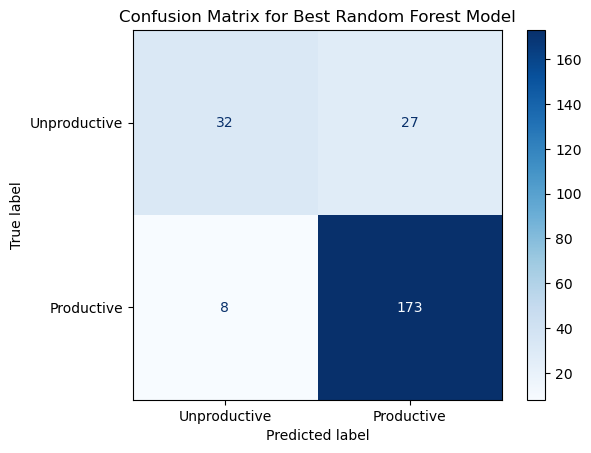

In [48]:
# Plotting the Confusion Matrix
# Generate confusion matrix for the best Random Forest model
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Unproductive", "Productive"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

The confusion matrix for the Random Forest model shows a similar breakdown to that of the Decision Tree model:

- True Positives (TP): 173 - The model correctly predicted 173 instances as "Productive."
- True Negatives (TN): 32 - The model correctly predicted 31 instances as "Unproductive."
- False Positives (FP): 27 - The model incorrectly predicted 28 instances as "Productive" when they were actually "Unproductive."
- False Negatives (FN): 8 - The model incorrectly predicted 8 instances as "Unproductive" when they were actually "Productive."

The Random Forest model demonstrates a balanced performance with slightly better handling of the "Productive" class compared to the Decision Tree model. It shows more accurate predictions with fewer false negatives and a slightly better performance in terms of false positives.

#### Advanced Decision Tree & Random Forest
In this section, we will further refine our Decision Tree and Random Forest models by applying advanced techniques to improve their predictive power and generalizability. These techniques include:

- Hyperparameter Tuning with GridSearchCV: Optimize the model's hyperparameters for better performance.
- Cross-Validation with Stratified K-Folds: Ensure robust evaluation.
- Random Forest Analysis: Compare and validate the Decision Tree with a Random Forest model for better results.

1. Hyperparameter Tuning with GridSearchCV

We will use GridSearchCV to search for the best hyperparameters for our Decision Tree model. This involves defining a parameter grid and letting the model choose the combination that results in the best performance.

In [49]:
# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=24), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", round(grid_search.best_score_, 2))

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy with Best Parameters:", round(accuracy_score(y_test, y_pred_best), 2))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score: 0.82
Test Accuracy with Best Parameters: 0.86


2. Cross-Validation with Stratified K-Folds

Using Stratified K-Folds helps in ensuring that each fold of cross-validation has the same proportion of classes as the original dataset.

In [50]:
# Stratified K-Folds cross-validator
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=24)

# Evaluate the model with Stratified K-Folds
scores = cross_val_score(best_model, X, y, cv=strat_k_fold, scoring='accuracy')

print("Cross-Validation Scores with Stratified K-Folds:", scores)
print("Mean CV Score:", round(scores.mean(), 2))

Cross-Validation Scores with Stratified K-Folds: [0.85833333 0.83333333 0.8        0.875      0.86666667 0.85
 0.85833333 0.78991597 0.81512605 0.8487395 ]
Mean CV Score: 0.84


3. Random Forest Analysis

Random Forest, an ensemble learning method, can often provide more robust predictions than a single Decision Tree due to its use of multiple trees.

In [51]:
# Initialize Random Forest Classifier
forest = RandomForestClassifier(random_state=24)

# Parameter grid for Random Forest
forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
forest_grid_search = GridSearchCV(forest, forest_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit and find best parameters
forest_grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", forest_grid_search.best_params_)
print("Best Cross-Validation Score for Random Forest:", round(forest_grid_search.best_score_, 2))

# Evaluate the best Random Forest model
best_forest_model = forest_grid_search.best_estimator_
y_pred_forest_adv = best_forest_model.predict(X_test)
print("Test Accuracy with Best Random Forest Parameters:", round(accuracy_score(y_test, y_pred_forest_adv), 2))

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score for Random Forest: 0.84
Test Accuracy with Best Random Forest Parameters: 0.85


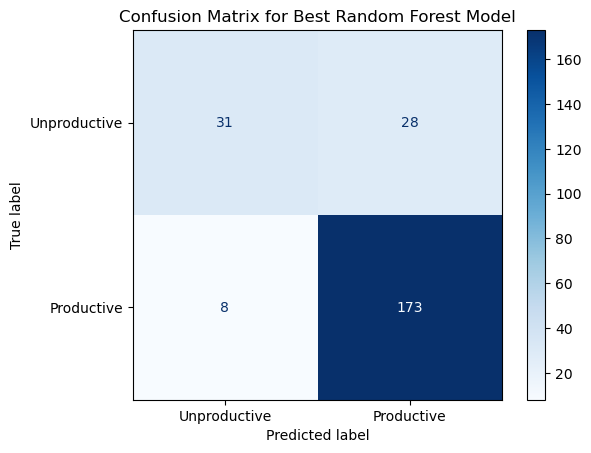

In [52]:
# Plotting the Confusion Matrix
# Generate confusion matrix for the best Random Forest model
conf_matrix = confusion_matrix(y_test, y_pred_forest_adv)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Unproductive", "Productive"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

The confusion matrix visualizes the performance of the best-tuned Random Forest model by showing the number of true positives (Productive correctly predicted), true negatives (Unproductive correctly predicted), false positives (Unproductive predicted as Productive), and false negatives (Productive predicted as Unproductive). In this case, the matrix indicates that the model correctly predicted 173 out of 181 Productive cases and 31 out of 62 Unproductive cases. However, there are still some misclassifications, suggesting room for improvement.

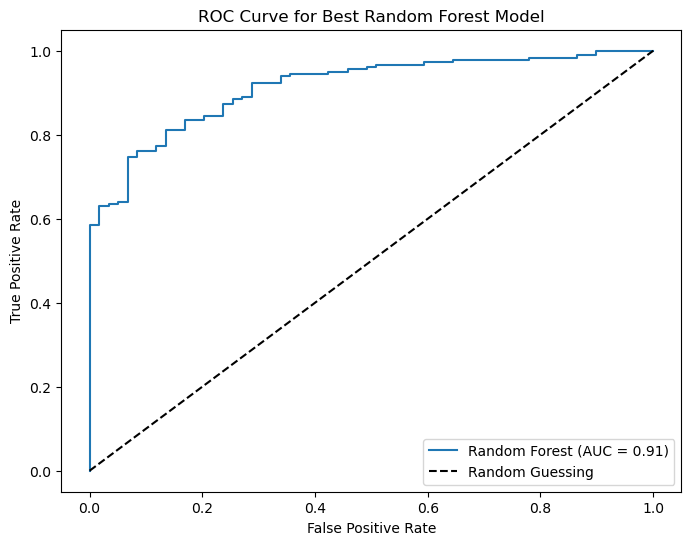

In [53]:
# Predict probabilities
y_probs = best_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc='lower right')
plt.show()

The Receiver Operating Characteristic (ROC) curve shows the diagnostic ability of the best Random Forest model. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) is 0.91, indicating that the model has a high ability to distinguish between the two classes, "Unproductive" and "Productive." The closer the AUC is to 1, the better the model performs in distinguishing between the classes.

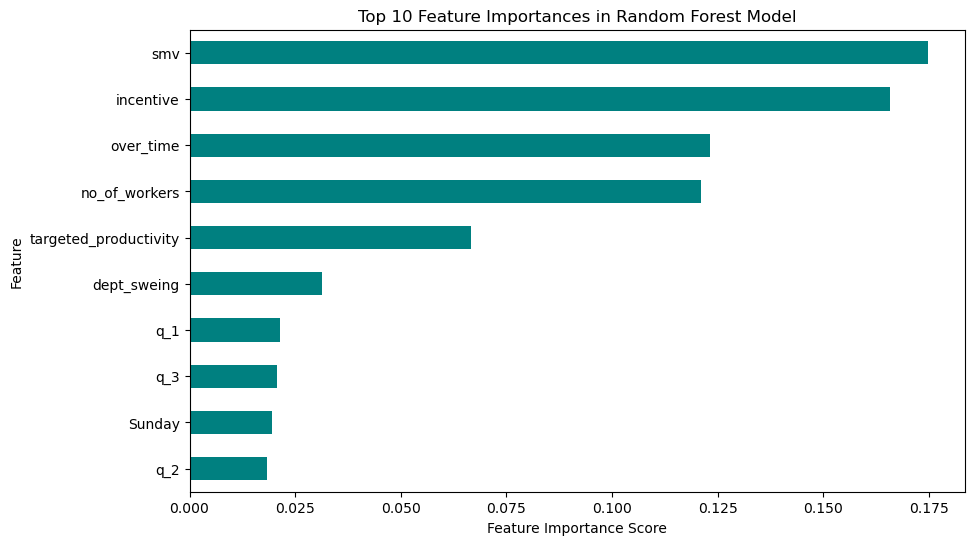

In [54]:
# Extract feature importances from the Random Forest model
feature_importances = pd.Series(best_forest_model.feature_importances_, index=X_train.columns)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

The Random Forest model has identified 'incentive', 'smv' (Standard Minute Value), and 'over_time' as the most significant predictors of team productivity. The 'incentive' feature is crucial as it reflects the financial motivation provided to employees; higher incentives are likely to boost productivity. 'smv' represents the allocated time for tasks; shorter times might indicate efficiency but could also imply unrealistic targets that might hinder productivity. 'Over_time' reflects extra work hours, which, while increasing output, may lead to burnout and reduced efficiency over time. Understanding these factors allows managers to optimize team schedules, adjust incentives, and set more achievable production targets.

#### Comprehensive Summary of Initial and Advanced Decision Tree & Random Forest Analysis

In this project, we conducted both an initial and advanced analysis of Decision Tree and Random Forest models to predict team productivity. The goal was to evaluate the models' performance, identify the most influential features, and optimize the model parameters for better generalization and accuracy. Below, we summarize the key findings and compare the initial analysis with the results from the advanced techniques.

#### Initial Decision Tree Analysis

**Setup and Performance:**

The initial Decision Tree model was set up with a max_depth of 3 to prevent overfitting. Key features identified were "incentive" and "smv" (Standard Minute Value), which frequently appeared in the decision splits.

Performance metrics: Test Accuracy: 0.85, Precision: 0.88, Recall: 0.93, F1 Score: 0.90.

**Insights:**

The decision splits revealed that "incentive" and "smv" were the most significant features for predicting productivity. These findings suggest that the allocated time for tasks ("smv") and financial incentives play crucial roles in determining team productivity.

**Limitations:**

The relatively shallow depth (max_depth=3) limited the model's ability to capture more intricate patterns in the data, potentially leading to underfitting.

#### Advanced Decision Tree Analysis

**Hyperparameter Tuning with GridSearchCV:**

The advanced analysis involved optimizing the Decision Tree model using GridSearchCV. The best parameters identified were criterion: 'entropy', max_depth: 5, min_samples_leaf: 2, min_samples_split: 2.

The optimized model achieved a Best Cross-Validation Score of 0.82.

**Improved Performance:**

After applying GridSearchCV for hyperparameter optimization, the accuracy improved slightly to 86%, indicating better generalization to unseen data.

**Comparison:**

The advanced Decision Tree model showed a modest improvement in accuracy after fine-tuning, emphasizing the importance of hyperparameter optimization in enhancing model performance and achieving a more generalizable model.

#### Initial Random Forest Analysis

**Setup and Performance:**

The initial Random Forest model, built with default settings, inherently handled overfitting better than a single Decision Tree. It achieved a Test Accuracy of 0.85 and an Out-Of-Bag (OOB) Score of 0.83.

**Insights:**

The Random Forest model reaffirmed the importance of "incentive" and "smv" as critical predictors, aligning with the Decision Tree's findings.

**Strengths and Limitations:**

While the Random Forest provided robust predictions, its default configuration was already near optimal, demonstrating less sensitivity to hyperparameter changes compared to a single Decision Tree.

#### Advanced Random Forest Analysis

**Hyperparameter Tuning:**

The advanced Random Forest model was fine-tuned using GridSearchCV to identify the optimal parameters (max_depth: None, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 200).

**Model Performance:**

The advanced analysis slightly improved the accuracy to 0.85, with the best parameters providing a Cross-Validation Score of 0.84 and a high AUC value of 0.91, showing effective differentiation between "Productive" and "Unproductive" teams.
Comparison:

Unlike the Decision Tree, the Random Forest model did not see a substantial performance boost from hyperparameter tuning, underscoring its inherent stability and strength in handling various data types without much fine-tuning.

#### Conclusion and Business Implications

The advanced analysis refined the performance of both models, particularly for the Decision Tree. Hyperparameter tuning allowed the Decision Tree to generalize better and achieve slightly higher accuracy. For the Random Forest, the initial model's performance was already near-optimal, and further tuning provided marginal improvements. This demonstrates that while both models are effective, Random Forests offer robust performance out-of-the-box, whereas Decision Trees benefit more from careful parameter adjustments.

#### Actionable Insights for Decision-Makers

- Key features such as 'incentive', 'smv', and 'over_time' are critical in predicting team productivity. Decision Trees provide straightforward interpretability, revealing clear decision rules that can guide managerial decisions.
- Random Forests, with their ensemble nature, deliver robust performance and generalization across various data scenarios. Decision-makers should consider:
  - Optimizing Team Schedules: Align task allocations based on 'smv' to ensure balanced workloads.
  - Adjusting Incentive Strategies: Tailor incentives to maximize productivity without causing burnout.
  - Continuous Model Monitoring: Regularly update models with new data to adapt to operational changes and maintain high predictive accuracy.

By leveraging these insights, organizations in the garment industry can enhance productivity outcomes, improve decision-making, and achieve operational efficiency.